# 資料預處理

In [0]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [62]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [64]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=20, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 3s - loss: 0.4380 - acc: 0.8829 - val_loss: 0.2181 - val_acc: 0.9408
Epoch 2/20
 - 2s - loss: 0.1908 - acc: 0.9454 - val_loss: 0.1559 - val_acc: 0.9553
Epoch 3/20
 - 2s - loss: 0.1353 - acc: 0.9619 - val_loss: 0.1259 - val_acc: 0.9646
Epoch 4/20
 - 2s - loss: 0.1025 - acc: 0.9701 - val_loss: 0.1118 - val_acc: 0.9679
Epoch 5/20
 - 2s - loss: 0.0809 - acc: 0.9773 - val_loss: 0.0983 - val_acc: 0.9716
Epoch 6/20
 - 2s - loss: 0.0659 - acc: 0.9817 - val_loss: 0.0932 - val_acc: 0.9725
Epoch 7/20
 - 2s - loss: 0.0544 - acc: 0.9852 - val_loss: 0.0905 - val_acc: 0.9741
Epoch 8/20
 - 2s - loss: 0.0458 - acc: 0.9877 - val_loss: 0.0832 - val_acc: 0.9758
Epoch 9/20
 - 2s - loss: 0.0379 - acc: 0.9902 - val_loss: 0.0822 - val_acc: 0.9760
Epoch 10/20
 - 2s - loss: 0.0315 - acc: 0.9915 - val_loss: 0.0802 - val_acc: 0.9763
Epoch 11/20
 - 2s - loss: 0.0261 - acc: 0.9940 - val_loss: 0.0781 - val_acc: 0.9763
Epoch 12/20
 - 2s - loss: 0.0217 - 

# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

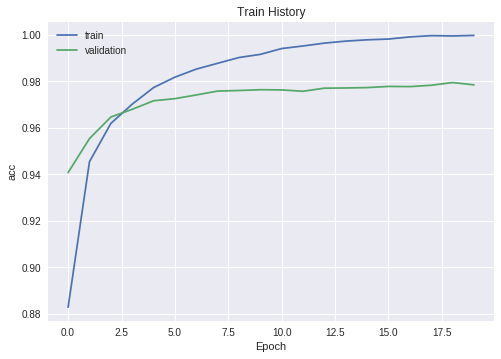

In [66]:
show_train_history(train_history,'acc','val_acc')

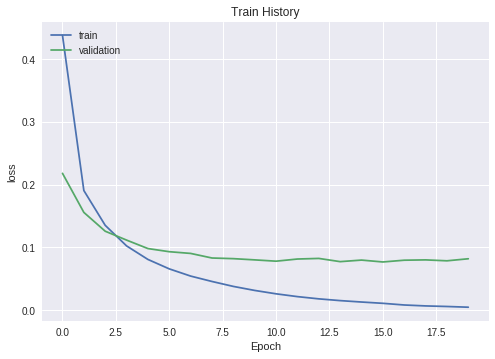

In [67]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [68]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 44us/step

accuracy= 0.979


# 進行預測

In [0]:
prediction=model.predict_classes(x_Test)

In [70]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

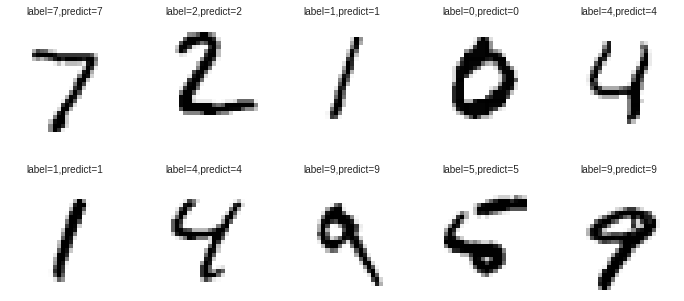

In [72]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix

In [73]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1125,3,1,0,1,2,1,2,0
2,5,0,1009,2,0,0,2,9,5,0
3,0,0,5,985,0,3,0,7,3,7
4,3,1,3,1,951,0,4,4,1,14
5,2,0,0,10,1,865,5,2,4,3
6,5,2,1,1,3,3,943,0,0,0
7,0,2,5,2,0,0,0,1018,0,1
8,4,1,6,7,1,2,3,9,938,3


In [74]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [75]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2597,5,3
4271,5,3
4360,5,3
5937,5,3
5972,5,3
9982,5,3


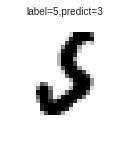

In [76]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=9982,num=1)

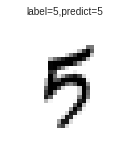

In [77]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)